# 🚚 Estatísticas de Veículos - Análise de Entregas

Análise detalhada das entregas realizadas pelos veículos no sistema de supply chain.

In [1]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Carregar dados
store_stats = pd.read_csv('stats/store_stats.csv')

print("📦 Dados carregados com sucesso!")
print(f"   Total de entregas: {len(store_stats)} registros")
print(f"\nColunas disponíveis:")
print(f"   {list(store_stats.columns)}")
print(f"\nPrimeiras linhas:")
print(store_stats.head())

📦 Dados carregados com sucesso!
   Total de entregas: 49 registros

Colunas disponíveis:
   ['order_id', 'store_jid', 'vehicle_jid', 'origin_warehouse', 'product', 'quantity', 'ETA', 'time_to_delivery', 'current_tick', 'final_state']

Primeiras linhas:
    order_id     store_jid vehicle_jid  origin_warehouse product  quantity  \
0  101000000  storee1_test   vehiclee1  warehousee2_test       B         9   
1  101000001  storee1_test   vehiclee1  warehousee2_test       D         6   
2  101000002  storee1_test   vehiclee1  warehousee2_test       D        12   
3  102000001  storee2_test   vehiclee3  warehousee2_test       C         1   
4  102000002  storee2_test   vehiclee3  warehousee2_test       A         4   

     ETA  time_to_delivery  current_tick final_state  
0  6.697             7.107         7.107   delivered  
1  6.697             7.107         7.107   delivered  
2  6.697             7.107         7.107   delivered  
3  9.154            16.132        16.132   delivered  
4  

# 📊 Desempenho por Veículo

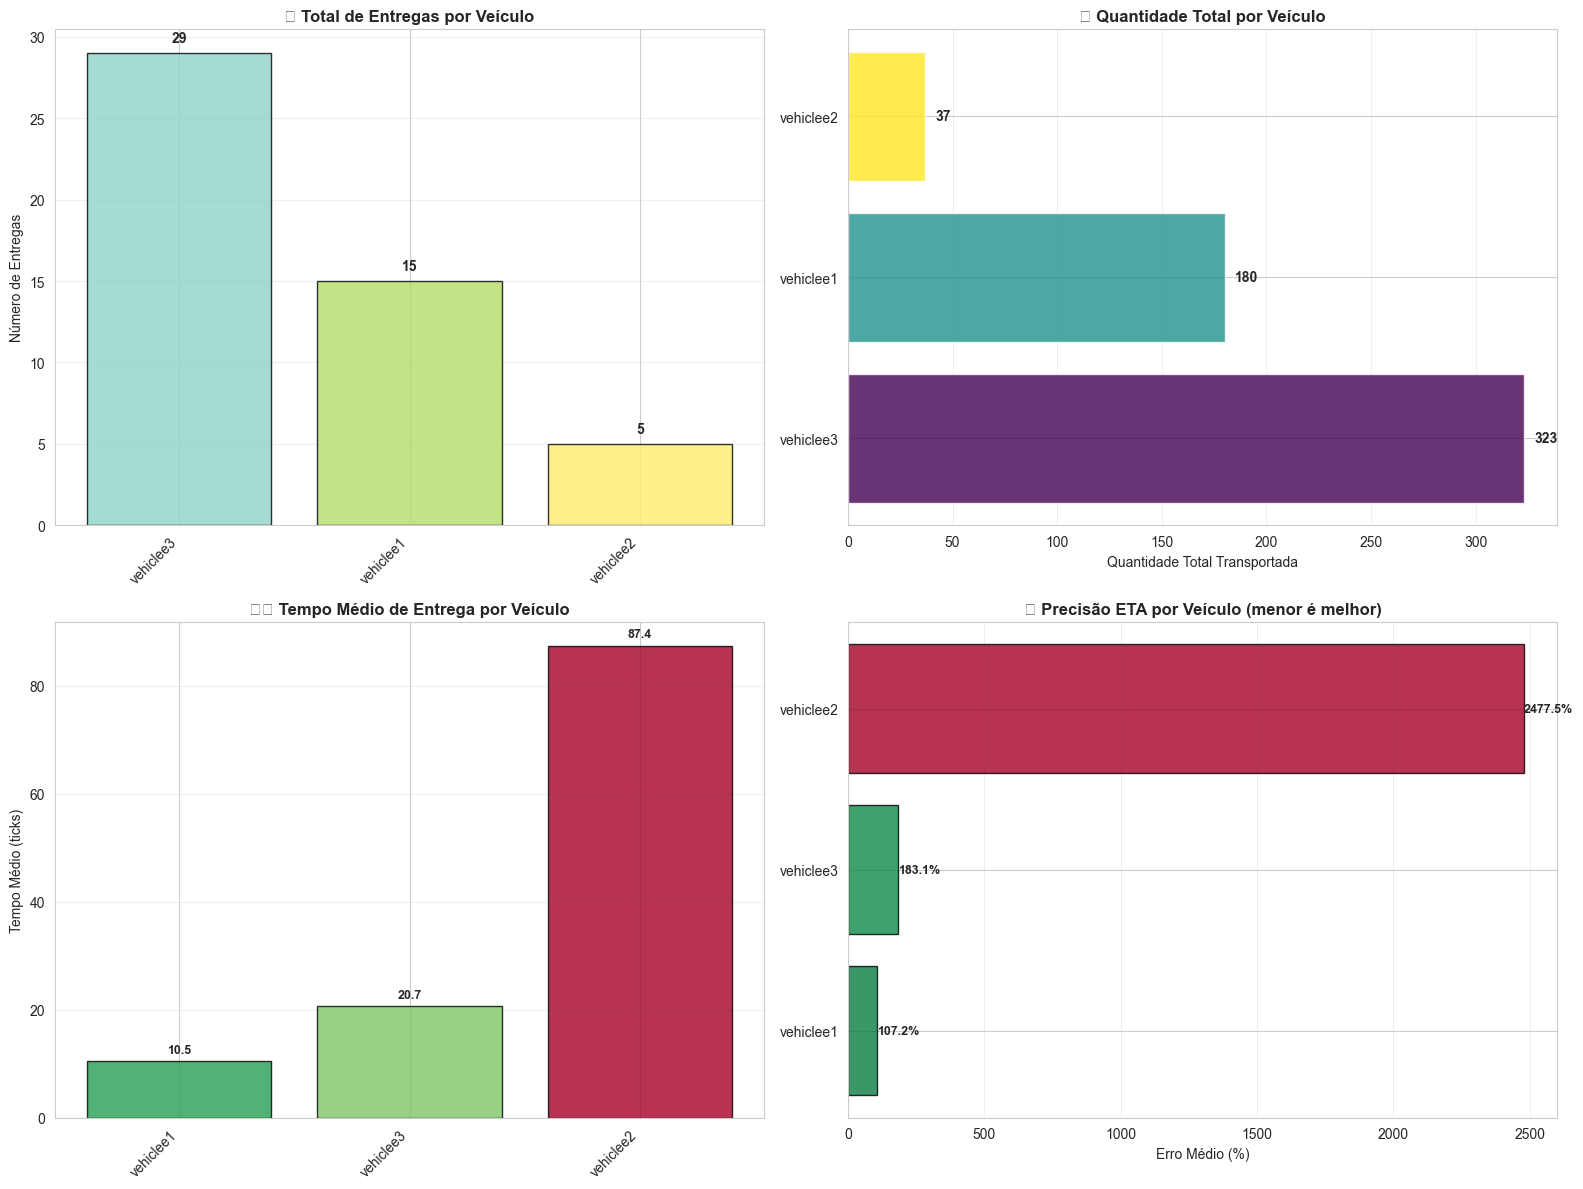


📊 Estatísticas por Veículo:

🚚 vehiclee3:
   • Entregas: 29
   • Quantidade total: 323
   • Tempo médio: 20.66 ticks
   • Erro ETA médio: 183.09%

🚚 vehiclee1:
   • Entregas: 15
   • Quantidade total: 180
   • Tempo médio: 10.52 ticks
   • Erro ETA médio: 107.24%

🚚 vehiclee2:
   • Entregas: 5
   • Quantidade total: 37
   • Tempo médio: 87.41 ticks
   • Erro ETA médio: 2477.50%


In [2]:
# Análise por veículo
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Total de entregas por veículo
vehicle_deliveries = store_stats.groupby('vehicle_jid').size().sort_values(ascending=False)
colors_vehicles = plt.cm.Set3(np.linspace(0, 1, len(vehicle_deliveries)))

axes[0, 0].bar(range(len(vehicle_deliveries)), vehicle_deliveries.values, 
               color=colors_vehicles, alpha=0.8, edgecolor='black')
axes[0, 0].set_xticks(range(len(vehicle_deliveries)))
axes[0, 0].set_xticklabels(vehicle_deliveries.index, rotation=45, ha='right')
axes[0, 0].set_ylabel('Número de Entregas')
axes[0, 0].set_title('🚚 Total de Entregas por Veículo', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(vehicle_deliveries.values):
    axes[0, 0].text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# 2. Quantidade total transportada por veículo
vehicle_quantity = store_stats.groupby('vehicle_jid')['quantity'].sum().sort_values(ascending=False)

axes[0, 1].barh(range(len(vehicle_quantity)), vehicle_quantity.values,
                color=plt.cm.viridis(np.linspace(0, 1, len(vehicle_quantity))), alpha=0.8)
axes[0, 1].set_yticks(range(len(vehicle_quantity)))
axes[0, 1].set_yticklabels(vehicle_quantity.index)
axes[0, 1].set_xlabel('Quantidade Total Transportada')
axes[0, 1].set_title('📦 Quantidade Total por Veículo', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

for i, v in enumerate(vehicle_quantity.values):
    axes[0, 1].text(v + 5, i, str(int(v)), va='center', fontweight='bold')

# 3. Tempo médio de entrega por veículo
vehicle_avg_time = store_stats.groupby('vehicle_jid')['time_to_delivery'].mean().sort_values(ascending=True)
colors_time = plt.cm.RdYlGn_r(vehicle_avg_time.values / vehicle_avg_time.max())

axes[1, 0].bar(range(len(vehicle_avg_time)), vehicle_avg_time.values,
               color=colors_time, alpha=0.8, edgecolor='black')
axes[1, 0].set_xticks(range(len(vehicle_avg_time)))
axes[1, 0].set_xticklabels(vehicle_avg_time.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Tempo Médio (ticks)')
axes[1, 0].set_title('⏱️ Tempo Médio de Entrega por Veículo', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(vehicle_avg_time.values):
    axes[1, 0].text(i, v + 1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 4. ETA vs Tempo Real por veículo (precisão)
vehicle_eta_accuracy = store_stats.groupby('vehicle_jid').apply(
    lambda x: ((x['time_to_delivery'] - x['ETA']).abs() / x['ETA'] * 100).mean()
).sort_values(ascending=True)

colors_accuracy = plt.cm.RdYlGn_r(vehicle_eta_accuracy.values / vehicle_eta_accuracy.max())

axes[1, 1].barh(range(len(vehicle_eta_accuracy)), vehicle_eta_accuracy.values,
                color=colors_accuracy, alpha=0.8, edgecolor='black')
axes[1, 1].set_yticks(range(len(vehicle_eta_accuracy)))
axes[1, 1].set_yticklabels(vehicle_eta_accuracy.index)
axes[1, 1].set_xlabel('Erro Médio (%)')
axes[1, 1].set_title('🎯 Precisão ETA por Veículo (menor é melhor)', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

for i, v in enumerate(vehicle_eta_accuracy.values):
    axes[1, 1].text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("\n📊 Estatísticas por Veículo:")
print("="*70)
for vehicle in vehicle_deliveries.index:
    v_data = store_stats[store_stats['vehicle_jid'] == vehicle]
    print(f"\n🚚 {vehicle}:")
    print(f"   • Entregas: {len(v_data)}")
    print(f"   • Quantidade total: {v_data['quantity'].sum()}")
    print(f"   • Tempo médio: {v_data['time_to_delivery'].mean():.2f} ticks")
    print(f"   • Erro ETA médio: {vehicle_eta_accuracy[vehicle]:.2f}%")

# ⏱️ Análise de Tempos de Entrega

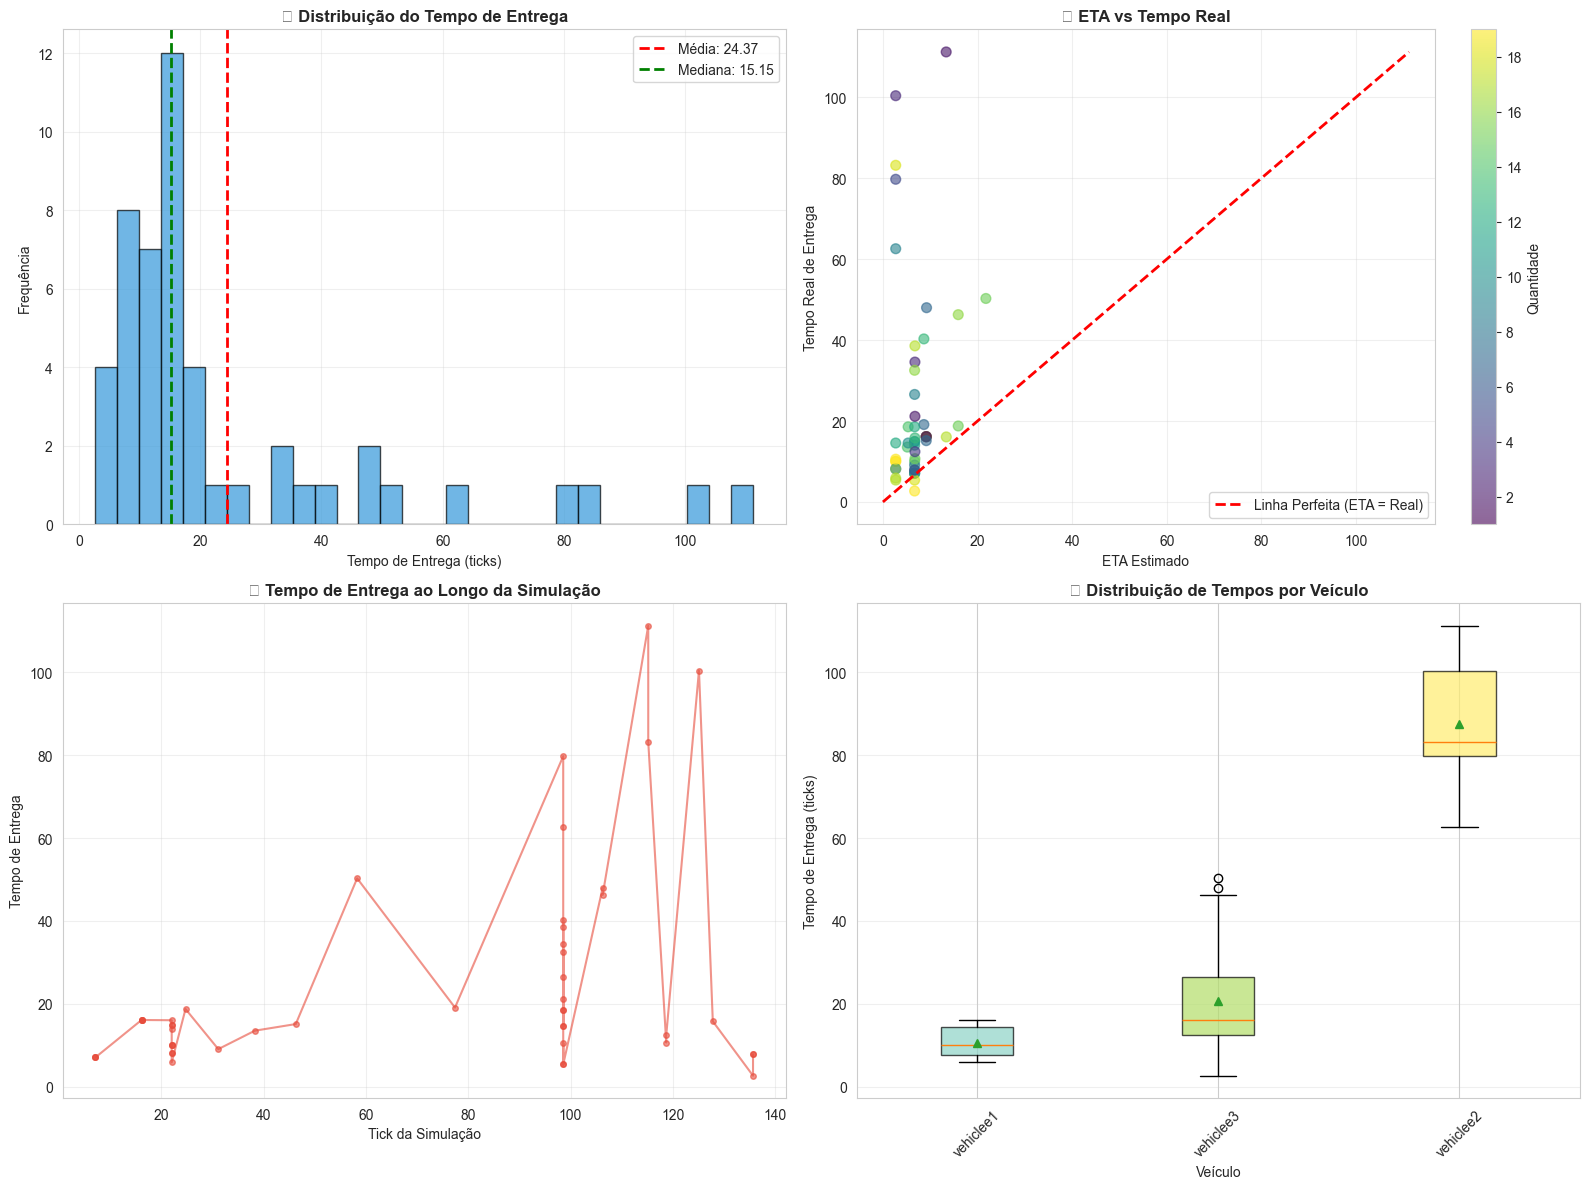


⏱️ Estatísticas de Tempo:
Tempo médio de entrega: 24.37 ticks
Tempo mediano de entrega: 15.15 ticks
Tempo mínimo: 2.70 ticks
Tempo máximo: 111.19 ticks
Desvio padrão: 24.89 ticks


In [3]:
# Análise de tempos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Distribuição do tempo de entrega
axes[0, 0].hist(store_stats['time_to_delivery'], bins=30, color='#3498db', 
                alpha=0.7, edgecolor='black')
axes[0, 0].axvline(store_stats['time_to_delivery'].mean(), color='red', 
                   linestyle='--', linewidth=2, label=f'Média: {store_stats["time_to_delivery"].mean():.2f}')
axes[0, 0].axvline(store_stats['time_to_delivery'].median(), color='green', 
                   linestyle='--', linewidth=2, label=f'Mediana: {store_stats["time_to_delivery"].median():.2f}')
axes[0, 0].set_xlabel('Tempo de Entrega (ticks)')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].set_title('📊 Distribuição do Tempo de Entrega', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. ETA vs Tempo Real - Scatter plot
axes[0, 1].scatter(store_stats['ETA'], store_stats['time_to_delivery'], 
                   alpha=0.6, s=50, c=store_stats['quantity'], cmap='viridis')
max_val = max(store_stats['ETA'].max(), store_stats['time_to_delivery'].max())
axes[0, 1].plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Linha Perfeita (ETA = Real)')
axes[0, 1].set_xlabel('ETA Estimado')
axes[0, 1].set_ylabel('Tempo Real de Entrega')
axes[0, 1].set_title('🎯 ETA vs Tempo Real', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)
cbar = plt.colorbar(axes[0, 1].collections[0], ax=axes[0, 1])
cbar.set_label('Quantidade')

# 3. Tempo de entrega ao longo da simulação
store_stats_sorted = store_stats.sort_values('current_tick')
axes[1, 0].plot(store_stats_sorted['current_tick'], store_stats_sorted['time_to_delivery'],
                marker='o', linestyle='-', alpha=0.6, markersize=4, color='#e74c3c')
axes[1, 0].set_xlabel('Tick da Simulação')
axes[1, 0].set_ylabel('Tempo de Entrega')
axes[1, 0].set_title('📈 Tempo de Entrega ao Longo da Simulação', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# 4. Box plot por veículo
vehicle_times = [store_stats[store_stats['vehicle_jid'] == v]['time_to_delivery'].values 
                 for v in store_stats['vehicle_jid'].unique()]
bp = axes[1, 1].boxplot(vehicle_times, labels=store_stats['vehicle_jid'].unique(),
                        patch_artist=True, showmeans=True)

for patch, color in zip(bp['boxes'], plt.cm.Set3(np.linspace(0, 1, len(bp['boxes'])))):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1, 1].set_xlabel('Veículo')
axes[1, 1].set_ylabel('Tempo de Entrega (ticks)')
axes[1, 1].set_title('📦 Distribuição de Tempos por Veículo', fontsize=12, fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n⏱️ Estatísticas de Tempo:")
print("="*70)
print(f"Tempo médio de entrega: {store_stats['time_to_delivery'].mean():.2f} ticks")
print(f"Tempo mediano de entrega: {store_stats['time_to_delivery'].median():.2f} ticks")
print(f"Tempo mínimo: {store_stats['time_to_delivery'].min():.2f} ticks")
print(f"Tempo máximo: {store_stats['time_to_delivery'].max():.2f} ticks")
print(f"Desvio padrão: {store_stats['time_to_delivery'].std():.2f} ticks")

# 📦 Análise de Produtos e Warehouses

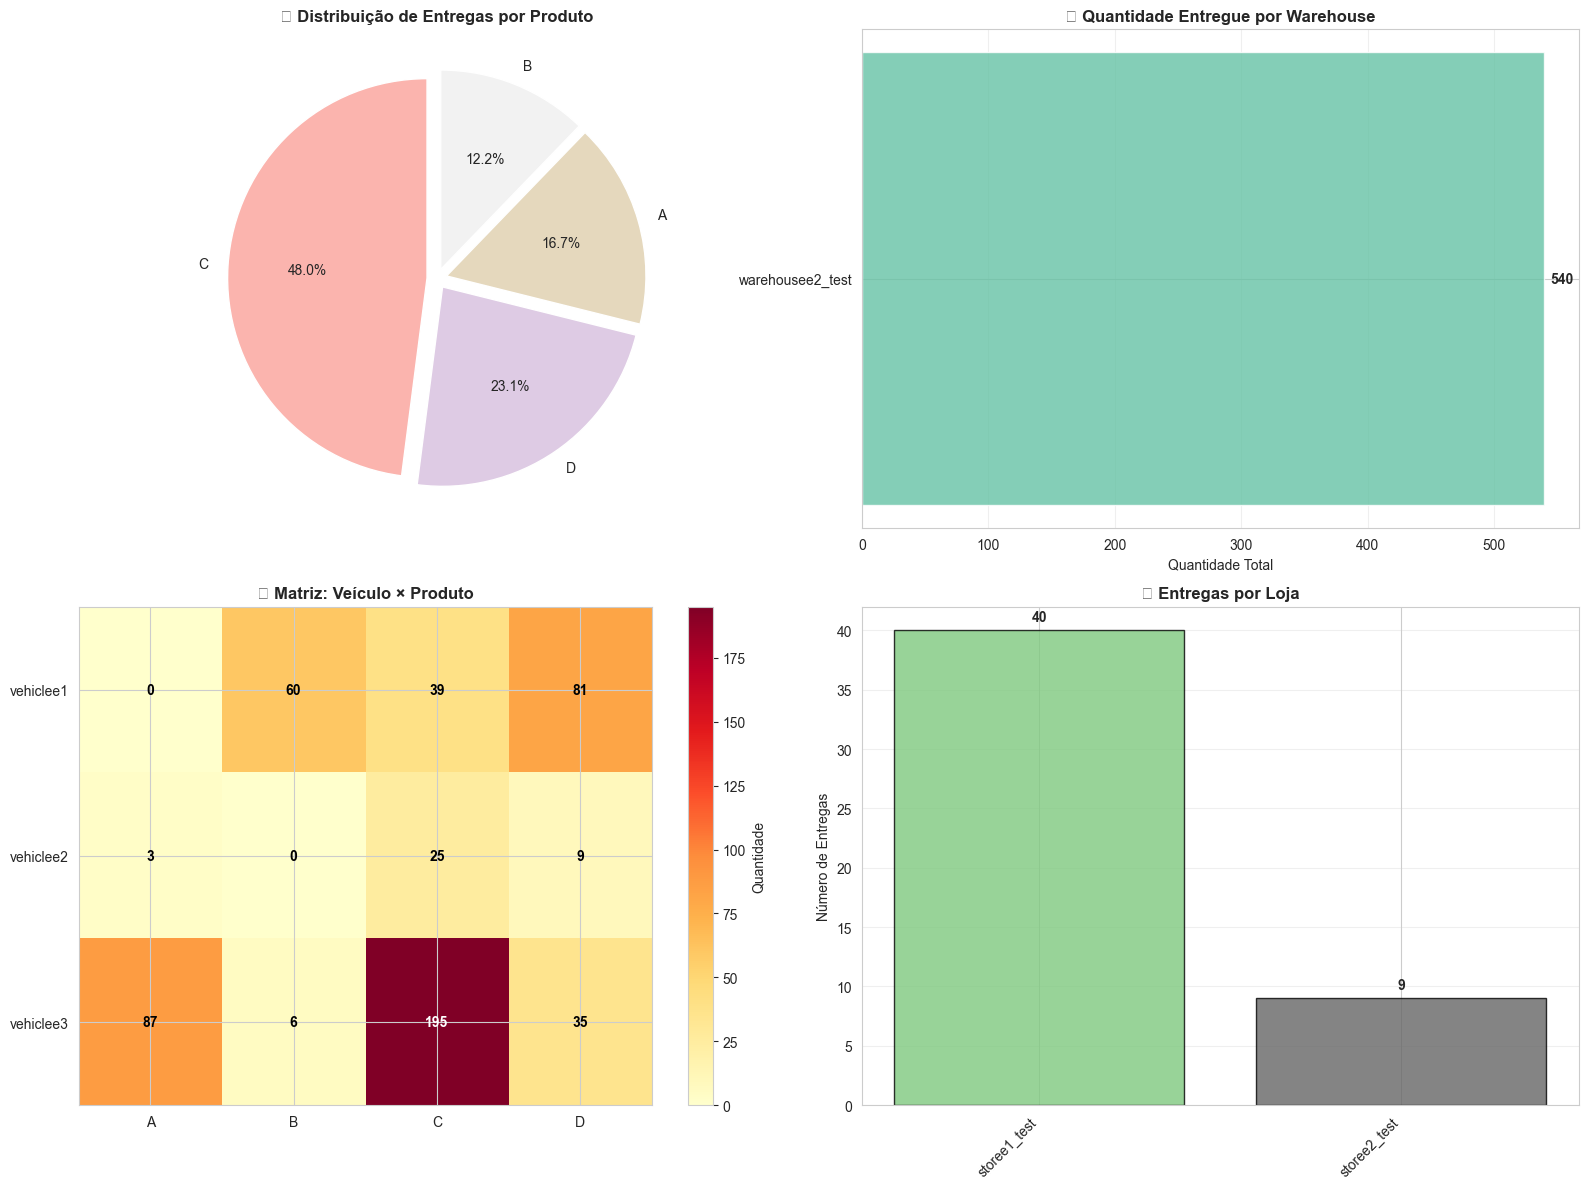


📦 Estatísticas de Produtos:

📊 Produto C:
   • Quantidade total: 259
   • Número de entregas: 22
   • Quantidade média por entrega: 11.77

📊 Produto D:
   • Quantidade total: 125
   • Número de entregas: 12
   • Quantidade média por entrega: 10.42

📊 Produto A:
   • Quantidade total: 90
   • Número de entregas: 8
   • Quantidade média por entrega: 11.25

📊 Produto B:
   • Quantidade total: 66
   • Número de entregas: 7
   • Quantidade média por entrega: 9.43


In [4]:
# Análise de produtos e warehouses
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Entregas por produto
product_deliveries = store_stats.groupby('product')['quantity'].sum().sort_values(ascending=False)
colors_products = plt.cm.Pastel1(np.linspace(0, 1, len(product_deliveries)))

axes[0, 0].pie(product_deliveries.values, labels=product_deliveries.index, 
               autopct='%1.1f%%', colors=colors_products, startangle=90,
               explode=[0.05] * len(product_deliveries))
axes[0, 0].set_title('📊 Distribuição de Entregas por Produto', fontsize=12, fontweight='bold')

# 2. Quantidade por warehouse de origem
warehouse_quantity = store_stats.groupby('origin_warehouse')['quantity'].sum().sort_values(ascending=False)

axes[0, 1].barh(range(len(warehouse_quantity)), warehouse_quantity.values,
                color=plt.cm.Set2(np.linspace(0, 1, len(warehouse_quantity))), alpha=0.8)
axes[0, 1].set_yticks(range(len(warehouse_quantity)))
axes[0, 1].set_yticklabels(warehouse_quantity.index)
axes[0, 1].set_xlabel('Quantidade Total')
axes[0, 1].set_title('🏭 Quantidade Entregue por Warehouse', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

for i, v in enumerate(warehouse_quantity.values):
    axes[0, 1].text(v + 5, i, str(int(v)), va='center', fontweight='bold')

# 3. Matriz de produtos por veículo
product_vehicle = store_stats.groupby(['vehicle_jid', 'product'])['quantity'].sum().unstack(fill_value=0)

im = axes[1, 0].imshow(product_vehicle.values, cmap='YlOrRd', aspect='auto')
axes[1, 0].set_yticks(range(len(product_vehicle.index)))
axes[1, 0].set_xticks(range(len(product_vehicle.columns)))
axes[1, 0].set_yticklabels(product_vehicle.index)
axes[1, 0].set_xticklabels(product_vehicle.columns)
axes[1, 0].set_title('🔥 Matriz: Veículo × Produto', fontsize=12, fontweight='bold')
plt.colorbar(im, ax=axes[1, 0], label='Quantidade')

# Add values
for i in range(len(product_vehicle.index)):
    for j in range(len(product_vehicle.columns)):
        text = axes[1, 0].text(j, i, int(product_vehicle.iloc[i, j]),
                              ha="center", va="center", 
                              color="white" if product_vehicle.iloc[i, j] > product_vehicle.values.max()/2 else "black",
                              fontweight='bold', fontsize=10)

# 4. Entregas por loja de destino
store_deliveries = store_stats.groupby('store_jid').size().sort_values(ascending=False)

axes[1, 1].bar(range(len(store_deliveries)), store_deliveries.values,
               color=plt.cm.Accent(np.linspace(0, 1, len(store_deliveries))), alpha=0.8, edgecolor='black')
axes[1, 1].set_xticks(range(len(store_deliveries)))
axes[1, 1].set_xticklabels(store_deliveries.index, rotation=45, ha='right')
axes[1, 1].set_ylabel('Número de Entregas')
axes[1, 1].set_title('🏪 Entregas por Loja', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

for i, v in enumerate(store_deliveries.values):
    axes[1, 1].text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📦 Estatísticas de Produtos:")
print("="*70)
for product in product_deliveries.index:
    p_data = store_stats[store_stats['product'] == product]
    print(f"\n📊 Produto {product}:")
    print(f"   • Quantidade total: {p_data['quantity'].sum()}")
    print(f"   • Número de entregas: {len(p_data)}")
    print(f"   • Quantidade média por entrega: {p_data['quantity'].mean():.2f}")

# 🎯 KPIs e Dashboard Final

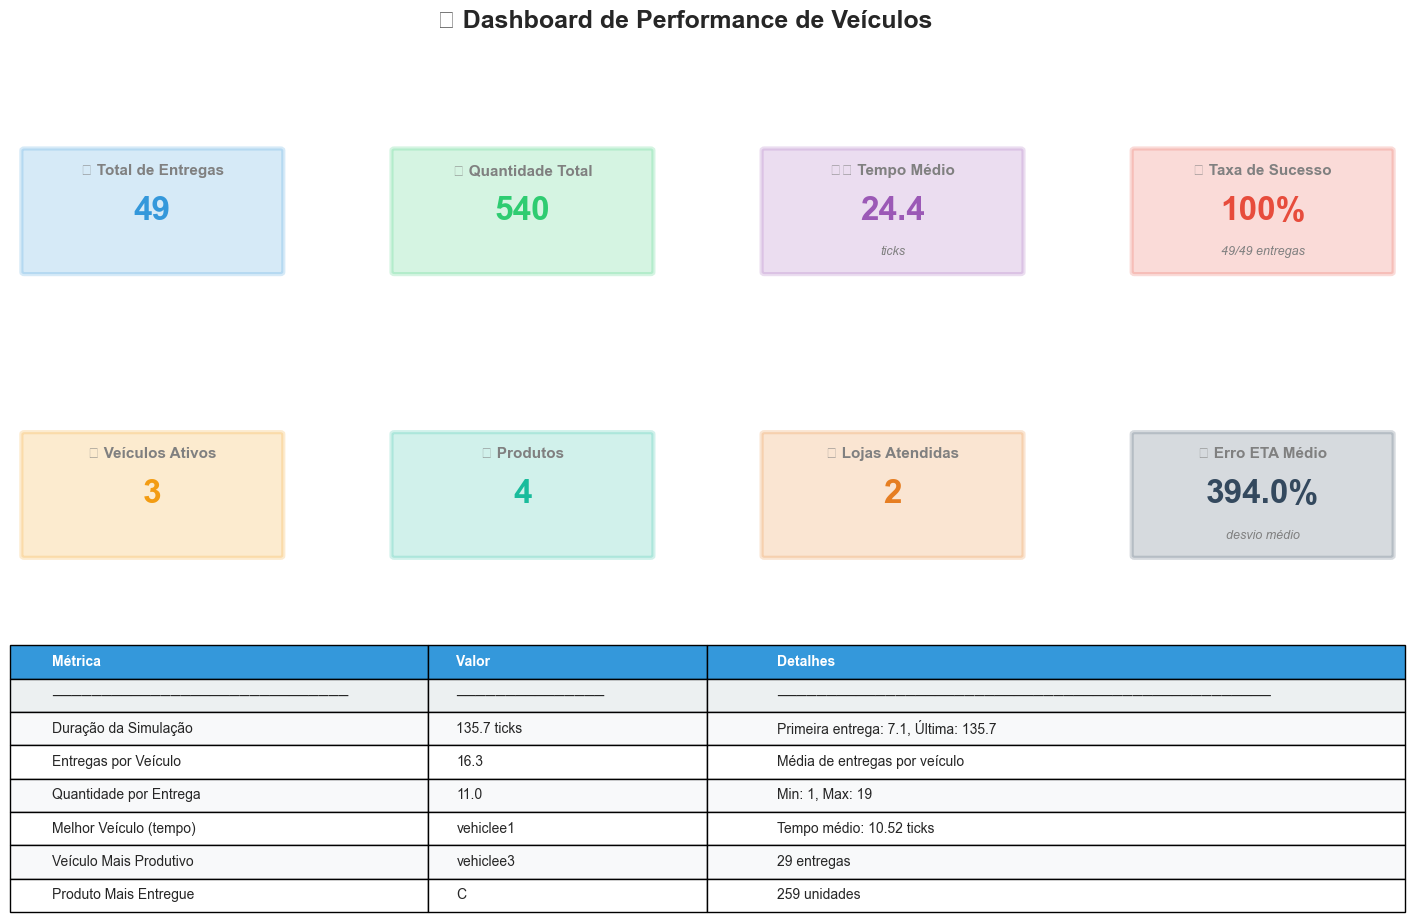


🚚 RESUMO DA ANÁLISE DE VEÍCULOS

✅ Total de entregas: 49
📦 Quantidade total transportada: 540
⏱️ Tempo médio de entrega: 24.37 ticks
🎯 Erro ETA médio: 394.00%
🚗 Veículos ativos: 3
✅ Taxa de sucesso: 100.0%


In [5]:
# KPI Dashboard
from matplotlib.patches import FancyBboxPatch

fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 4, hspace=0.4, wspace=0.3)

# Helper function para criar KPI box
def create_kpi_box(ax, title, value, subtitle="", color='#3498db'):
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')
    
    box = FancyBboxPatch((0.5, 2), 9, 6, boxstyle="round,pad=0.1", 
                         edgecolor=color, facecolor=color, alpha=0.2, linewidth=3)
    ax.add_patch(box)
    
    ax.text(5, 7, title, ha='center', va='center', fontsize=11, fontweight='bold', color='gray')
    ax.text(5, 5, str(value), ha='center', va='center', fontsize=24, fontweight='bold', color=color)
    
    if subtitle:
        ax.text(5, 3, subtitle, ha='center', va='center', fontsize=9, color='gray', style='italic')

# KPI 1: Total de Entregas
ax1 = fig.add_subplot(gs[0, 0])
create_kpi_box(ax1, "🚚 Total de Entregas", len(store_stats), color='#3498db')

# KPI 2: Quantidade Total
ax2 = fig.add_subplot(gs[0, 1])
create_kpi_box(ax2, "📦 Quantidade Total", f"{store_stats['quantity'].sum():,}", color='#2ecc71')

# KPI 3: Tempo Médio
ax3 = fig.add_subplot(gs[0, 2])
create_kpi_box(ax3, "⏱️ Tempo Médio", f"{store_stats['time_to_delivery'].mean():.1f}", 
              "ticks", color='#9b59b6')

# KPI 4: Taxa de Sucesso
success_rate = (store_stats['final_state'] == 'delivered').sum() / len(store_stats) * 100
ax4 = fig.add_subplot(gs[0, 3])
create_kpi_box(ax4, "✅ Taxa de Sucesso", f"{success_rate:.0f}%", 
              f"{(store_stats['final_state'] == 'delivered').sum()}/{len(store_stats)} entregas", color='#e74c3c')

# KPI 5: Veículos Ativos
unique_vehicles = store_stats['vehicle_jid'].nunique()
ax5 = fig.add_subplot(gs[1, 0])
create_kpi_box(ax5, "🚗 Veículos Ativos", unique_vehicles, color='#f39c12')

# KPI 6: Produtos Diferentes
unique_products = store_stats['product'].nunique()
ax6 = fig.add_subplot(gs[1, 1])
create_kpi_box(ax6, "📊 Produtos", unique_products, color='#1abc9c')

# KPI 7: Lojas Atendidas
unique_stores = store_stats['store_jid'].nunique()
ax7 = fig.add_subplot(gs[1, 2])
create_kpi_box(ax7, "🏪 Lojas Atendidas", unique_stores, color='#e67e22')

# KPI 8: Precisão Média ETA
avg_eta_error = ((store_stats['time_to_delivery'] - store_stats['ETA']).abs() / store_stats['ETA'] * 100).mean()
ax8 = fig.add_subplot(gs[1, 3])
create_kpi_box(ax8, "🎯 Erro ETA Médio", f"{avg_eta_error:.1f}%", 
              "desvio médio", color='#34495e')

# Tabela de performance
ax_table = fig.add_subplot(gs[2, :])
ax_table.axis('tight')
ax_table.axis('off')

performance_data = [
    ['Métrica', 'Valor', 'Detalhes'],
    ['─' * 30, '─' * 15, '─' * 50],
    ['Duração da Simulação', f"{store_stats['current_tick'].max():.1f} ticks", 
     f"Primeira entrega: {store_stats['current_tick'].min():.1f}, Última: {store_stats['current_tick'].max():.1f}"],
    ['Entregas por Veículo', f"{len(store_stats) / unique_vehicles:.1f}", 
     f'Média de entregas por veículo'],
    ['Quantidade por Entrega', f"{store_stats['quantity'].mean():.1f}", 
     f"Min: {store_stats['quantity'].min()}, Max: {store_stats['quantity'].max()}"],
    ['Melhor Veículo (tempo)', store_stats.groupby('vehicle_jid')['time_to_delivery'].mean().idxmin(), 
     f"Tempo médio: {store_stats.groupby('vehicle_jid')['time_to_delivery'].mean().min():.2f} ticks"],
    ['Veículo Mais Produtivo', store_stats.groupby('vehicle_jid').size().idxmax(),
     f"{store_stats.groupby('vehicle_jid').size().max()} entregas"],
    ['Produto Mais Entregue', store_stats.groupby('product')['quantity'].sum().idxmax(),
     f"{store_stats.groupby('product')['quantity'].sum().max()} unidades"],
]

table = ax_table.table(cellText=performance_data, cellLoc='left', loc='center',
                      colWidths=[0.3, 0.2, 0.5])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Estilo header
for i in range(3):
    table[(0, i)].set_facecolor('#3498db')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Estilo separador
for i in range(3):
    table[(1, i)].set_facecolor('#ecf0f1')

# Cores alternadas
for i in range(2, len(performance_data)):
    for j in range(3):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#f8f9fa')
        else:
            table[(i, j)].set_facecolor('white')

plt.suptitle('🎯 Dashboard de Performance de Veículos', fontsize=18, fontweight='bold', y=0.98)
plt.show()

print("\n" + "="*80)
print("🚚 RESUMO DA ANÁLISE DE VEÍCULOS")
print("="*80)
print(f"\n✅ Total de entregas: {len(store_stats)}")
print(f"📦 Quantidade total transportada: {store_stats['quantity'].sum()}")
print(f"⏱️ Tempo médio de entrega: {store_stats['time_to_delivery'].mean():.2f} ticks")
print(f"🎯 Erro ETA médio: {avg_eta_error:.2f}%")
print(f"🚗 Veículos ativos: {unique_vehicles}")
print(f"✅ Taxa de sucesso: {success_rate:.1f}%")
print("="*80)